In [1]:
#conda list

原代码是morvan tf1写的，有些地方改了改跑通的。其实目前使用tf keras或者pytorch搭nn更方便的，不用整那么多placeholder

#Some hyperparameters:
epoches：games轮数（300）
alpha (LearningRate):0.01
  
Gamme(reward_decay)=0.9,
Epsilon(e_greedy)=0.9,
epsilon的increment并未设置.
replace_target_iter=200, 即每学200次解冻target net参数，同步为最新参数
memory_size=2000,


step记录程序开始后的总步数，200步后每5步 learn一次

#确认输出顺序无误 

输出是没问题的，在text editor里看完整的就好

#解释图

RL并不是一开始就拥有所有数据，所以它的GD训练的cost不是一直下降的，由于新经历等的加入，可能训练一段时间后还会上升cost，所以看到的plot是很典型的RL. 可以取很大的epoches试试看

#问题复杂性减弱
如果有两(多)个坑，记忆库中掉坑的记忆多，学习获胜的记忆太少，效果不好
possible solutions:
1.多个坑，扩大记忆库并且限定当获胜记忆高于几次比如5次后再开始learn
2.初期给负面记忆/正面记忆的ratio设定一个bar，learn一段时间后去掉bar

#save_load

TBD

#查看logs
activate spinningup env
tensorboard --logdir=logs
可以对照代码注释再过一遍图的结构和input，output，node的dimensions

E.g. eval_net 
input[?*2] ✖️ Assign[2*10] ✖️ Assign_2[10*4] = loss[?*4]
可以看出，assign即l1的w，assign_2为l2的w, assign_1和assign_3分别为b1、b2
不同懂subgraph node个数什么意思以及loss给train的2tensors是什么


#extend to a more complex scenario E.g. Atari Game: Space Invaders

TBD

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
200


2023-07-14 14:07:42.073449: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Episode 0, total steps= 125
Episode 1, total steps= 196

learn steps=0: target_params_replaced

learn steps til now= 1
learn steps til now= 2
learn steps til now= 3
learn steps til now= 4
learn steps til now= 5
learn steps til now= 6
learn steps til now= 7
learn steps til now= 8
learn steps til now= 9
learn steps til now= 10
learn steps til now= 11
learn steps til now= 12
learn steps til now= 13
learn steps til now= 14
learn steps til now= 15
learn steps til now= 16
learn steps til now= 17
learn steps til now= 18
learn steps til now= 19
learn steps til now= 20
learn steps til now= 21
learn steps til now= 22
learn steps til now= 23
learn steps til now= 24
learn steps til now= 25
learn steps til now= 26
learn steps til now= 27
learn steps til now= 28
learn steps til now= 29
learn steps til now= 30
learn steps til now= 31
learn steps til now= 32
learn steps til now= 33
learn steps til now= 34
learn steps til now= 35
learn steps til now= 36
learn steps til now= 37
learn steps til now= 38
l

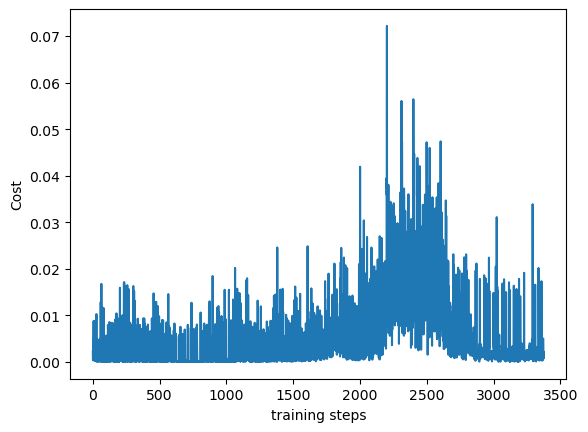

: 

In [2]:
from maze_env import Maze
from RL_brain import DeepQNetwork      

epoches=1500
def run_maze():
    step = 0 #记录当前总步数，用来决定target_net的定期更新
    for episode in range(epoches):
        # initial observation
        observation = env.reset()

        while True:
            # fresh env
            env.render()

            # RL choose action based on observation
            action = RL.choose_action(observation)

            # RL take action and get next observation and reward
            observation_, reward, done = env.step(action)

            RL.store_transition(observation, action, reward, observation_)

            #200步以后 每5步learn一次，注意这个step是从运行开始算，不是每个episode的step。
            # 这个有什么很特别的意义吗？
            # Re：1.感觉主要也是先积累一些记忆再开始训练，不然一方面样本少，都不够minibatch size，
            #     2.另一方面开始太早的话sample和没sample一样，sequentail 特征太强，我们需要的是减少一些相关性
            if (step > 200) and (step % 5 == 0):
                RL.learn()

            # swap observation
            observation = observation_

            #update step
            step += 1

            # break while loop when end of this episode
            if done:
                print('Episode '+str(episode)+', total steps= '+str(step))
                break
            

    # end of game
    print('game over')
    env.destroy()


if __name__ == "__main__":
    # maze game
    env = Maze()
    RL = DeepQNetwork(env.n_actions, env.n_features,
                      learning_rate=0.01,   
                      reward_decay=0.9,
                      e_greedy=0.9,
                      replace_target_iter=200,    #像这种defintion function中已有预设的参数，此时会覆盖掉吧
                      memory_size=2000,
                      output_graph=True          
                      )
    print(RL.replace_target_iter)
    env.after(epoches, run_maze)
    env.mainloop()
    RL.plot_cost()